<a href="https://colab.research.google.com/github/TAUforPython/TMS-pain-analysis/blob/main/ML%20TMS%20pain%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/TMS-pain-analysis/refs/heads/main/test_datasets/tms_raw_data.csv'

raw_data = pd.read_csv(link_url, sep = ';')
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,theshold_edge_right.1,theshold_edge_left.1,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,"-0,6","-7,8","140,7675","178,1633333",61,58,"3,277777778",NaN,NaN,NaN
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,"17,2","21,2","73,48533333","51,33366667",46,40,"3,277777778",NaN,NaN,NaN
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,"4,3","1,2","145,275","189,0625",56,60,"3,277777778",NaN,NaN,NaN
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,"6,2","23,8","66,66191667","88,53916667",26,33,"3,277777778",NaN,NaN,NaN
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,"4,7","-0,26","59,29183333","59,76133333",42,52,"3,277777778",NaN,NaN,NaN


In [76]:
raw_data.describe()

,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,score_spilberg_person,...,theshold_edge_right,theshold_edge_left,interstimul_threshod,inhibition_threshold_right,inhibition_threshold_left,avg_interstimul_threshod,avg_inhibition_threshold_right,Unnamed: 51,Unnamed: 52,Unnamed: 53
count,47.000000,47.000000,34.000000,33.000000,30.000000,30.000000,30.000000,30.000000,28.000000,30.000000,...,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,0.0,0.0,0.0
mean,0.297872,54.361702,0.294118,178.272727,6.133333,36.200000,3.300000,12.033333,13.642857,48.166667,...,46.000000,46.085106,46.000000,46.085106,1.0,46.000000,46.085106,NaN,NaN,NaN
std,0.462267,15.113233,0.462497,137.557096,1.960530,15.829697,1.859737,7.122007,7.150314,8.936880,...,10.709606,9.881537,10.709606,9.881537,0.0,10.709606,9.881537,NaN,NaN,NaN
min,0.000000,20.000000,0.000000,3.000000,2.000000,10.000000,0.000000,0.000000,2.000000,27.000000,...,26.000000,27.000000,26.000000,27.000000,1.0,26.000000,27.000000,NaN,NaN,NaN
25%,0.000000,43.000000,0.000000,96.000000,5.000000,28.000000,2.000000,6.250000,8.750000,43.500000,...,39.000000,39.500000,39.000000,39.500000,1.0,39.000000,39.500000,NaN,NaN,NaN
50%,0.000000,59.000000,0.000000,120.000000,6.000000,36.000000,3.000000,11.500000,13.000000,50.000000,...,43.000000,44.000000,43.000000,44.000000,1.0,43.000000,44.000000,NaN,NaN,NaN
75%,1.000000,66.000000,1.000000,240.000000,8.000000,47.500000,5.000000,16.750000,18.250000,54.750000,...,51.500000,53.500000,51.500000,53.500000,1.0,51.500000,53.500000,NaN,NaN,NaN
max,1.000000,78.000000,1.000000,540.000000,10.000000,72.000000,7.000000,25.000000,27.000000,64.000000,...,76.000000,67.000000,76.000000,67.000000,1.0,76.000000,67.000000,NaN,NaN,NaN


Characteristics of the two groups – non-specific and radicular pain (with the degree of reliability, whether the differences are statistically significant):
1) Number of people in each group
2) Gender
3) Age
4) Pain duration in months
5) Central Disability Index
6) Oswestry Disability Index
7) Beck Depression Inventory
8) Spielberger Anxiety Inventory (with a comparison of reactive anxiety and trait anxiety)
9) Central Sensitization Questionnaire (with a comparison of two parts, where the second part is for comorbidities)

In [77]:
raw_data = raw_data.drop(['Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53','interstimul_interval','interstimul_threshod'], axis=1)
raw_data['age'].values[35] = 55
raw_data['age'].values[35]


np.int64(55)

In [78]:
raw_data = raw_data.drop(['score_dn4','score_paint_detect','score_pittsburg','score_mak_gill','nsaid_drug','miorelax_drug', 'antidepress_drug', 'anticonv_drug','radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'],axis=1)

In [79]:
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_beck,score_spilberg_person,score_spilberg_anxiety,...,theshold_edge_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right.1,theshold_edge_left.1,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,24.0,64.0,56.0,...,58,58,1,"-0,6","-7,8","140,7675","178,1633333",61,58,"3,277777778"
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,40,40,1,"17,2","21,2","73,48533333","51,33366667",46,40,"3,277777778"
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,9.0,45.0,32.0,...,60,60,1,"4,3","1,2","145,275","189,0625",56,60,"3,277777778"
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,8.0,43.0,42.0,...,33,33,1,"6,2","23,8","66,66191667","88,53916667",26,33,"3,277777778"
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,22.0,50.0,39.0,...,52,52,1,"4,7","-0,26","59,29183333","59,76133333",42,52,"3,277777778"


In [80]:
raw_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sex,47.0,0.30,0.46,0.0,0.00,0.0,1.00,1.0
age,47.0,54.62,15.02,20.0,45.00,59.0,66.00,78.0
pain_type,34.0,0.29,0.46,0.0,0.00,0.0,1.00,1.0
illnes_month,33.0,178.27,137.56,3.0,96.00,120.0,240.00,540.0
score_pain_reiting,30.0,6.13,1.96,2.0,5.00,6.0,8.00,10.0
score_osvestri,30.0,36.20,15.83,10.0,28.00,36.0,47.50,72.0
score_beck,28.0,13.64,7.15,2.0,8.75,13.0,18.25,27.0
score_spilberg_person,30.0,48.17,8.94,27.0,43.50,50.0,54.75,64.0
score_spilberg_anxiety,30.0,43.57,9.88,22.0,38.25,44.5,50.00,61.0
score_csi,27.0,39.81,14.49,16.0,32.50,39.0,47.50,69.0


In [81]:
raw_data = raw_data.dropna(subset='score_csi')

In [82]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 46
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      27 non-null     object 
 1   sex                             27 non-null     int64  
 2   age                             27 non-null     int64  
 3   pain_type                       27 non-null     float64
 4   illnes_month                    26 non-null     float64
 5   score_pain_reiting              27 non-null     float64
 6   score_osvestri                  27 non-null     float64
 7   score_beck                      25 non-null     float64
 8   score_spilberg_person           27 non-null     float64
 9   score_spilberg_anxiety          27 non-null     float64
 10  score_csi                       27 non-null     float64
 11  restless_legs                   27 non-null     float64
 12  fatigue                         27 non-null

# Short review of three subset

In [83]:
table_data = raw_data
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [84]:
subset_patient_columns = [
    'patient_id', 'sex', 'age', 'pain_type', 'illnes_month'
    ]
'''
subset_score_columns = [
    'patient_id',
    'score_pain_reiting', 'score_osvestri', 'score_dn4',
    'score_paint_detect', 'score_beck', 'score_spilberg_person',
    'score_spilberg_anxiety', 'score_pittsburg', 'score_csi','score_mak_gill'
    ]
'''
subset_score_columns = [
    'patient_id',
    'score_pain_reiting', 'score_osvestri',
    'score_beck', 'score_spilberg_person',
    'score_spilberg_anxiety', 'score_csi'
    ]
subset_dignosis_columns = [
    'patient_id',
    'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
    'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
    'panic_attack', 'depression'
    ]

subset_therapy_columns = [
    'patient_id',
    'nsaid_drug',
    'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
    'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'
    ]

subset_tms_columns = [
    'patient_id',
    'threshold_left', 'threshold_right', 'motor_evoked_right', 'motor_evoked_left',
    'avg_respone_right', 'avg_respone_left',
    'inhibition_threshold_right', 'inhibition_threshold_left',
    'theshold_edge_right', 'theshold_edge_left',
    'avg_avg_respone_right', 'avg_avg_respone_left',
    'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'
    ]

# Helicopter view
Perform a comprehensive exploratory data analysis and visualization on the `table_data` DataFrame, loaded from 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data.csv'. This analysis will include: data cleaning (dropping unnecessary columns, correcting the 'age' value, converting appropriate columns to numeric types handling comma decimal separators, and imputing missing values with the mean); visualizing patient demographics and basic information through histograms for 'age' and 'illnes_month', and countplots for 'sex' and 'pain_type'; generating a correlation heatmap for patient score metrics; creating countplots to show diagnosis and treatment prevalence; and finally, visualizing the relationships between Transcranial Magnetic Stimulation (TMS) measurements with another correlation heatmap.

## Stat analysis

In [85]:
table_data = raw_data

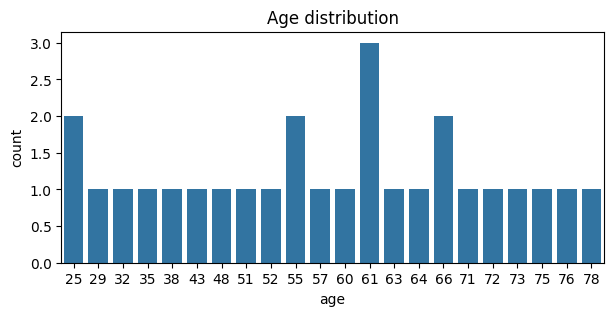

In [86]:
plt.figure(figsize=(7,3))
sns.countplot(data=table_data, x='age')
plt.title('Age distribution')
#plt.grid()
plt.show()

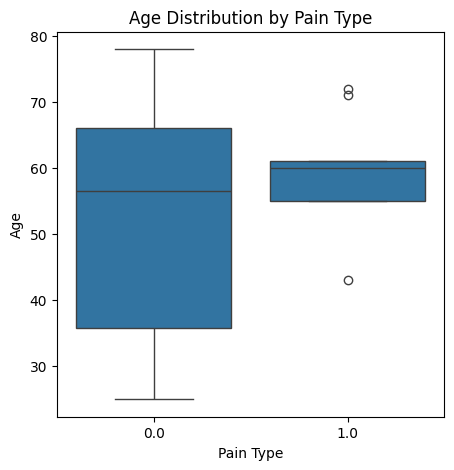

In [87]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='age')
plt.title('Age Distribution by Pain Type')
plt.xlabel('Pain Type')
plt.ylabel('Age')
plt.show()

In [88]:
for col in table_data.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data[col] = table_data[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data[col] = pd.to_numeric(table_data[col], errors='coerce')

        # Impute missing values with the mean if any NaNs are present after conversion
        #if table_data[col].isnull().any():
        #    table_data[col] = table_data[col].fillna(table_data[col].mean())

print("table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.")
print(table_data.head())

table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.
     patient_id  sex  age  pain_type  illnes_month  score_pain_reiting  \
0    patient_ 1    0   72        1.0         324.0                 9.0   
3    patient_ 4    0   25        0.0          60.0                 5.0   
6    patient_ 7    1   63        0.0          96.0                 9.0   
7    patient_ 8    0   48        0.0         120.0                 4.0   
19  patient_ 20    1   51        0.0           3.0                 6.0   

    score_osvestri  score_beck  score_spilberg_person  score_spilberg_anxiety  \
0             58.0        24.0                   64.0                    56.0   
3             22.0         8.0                   43.0                    42.0   
6             28.0         3.0                   29.0                    22.0   
7             10.0        21.0                   58.0                    42.0   
19            4

## Visualize Patient Demographics and Basic Information

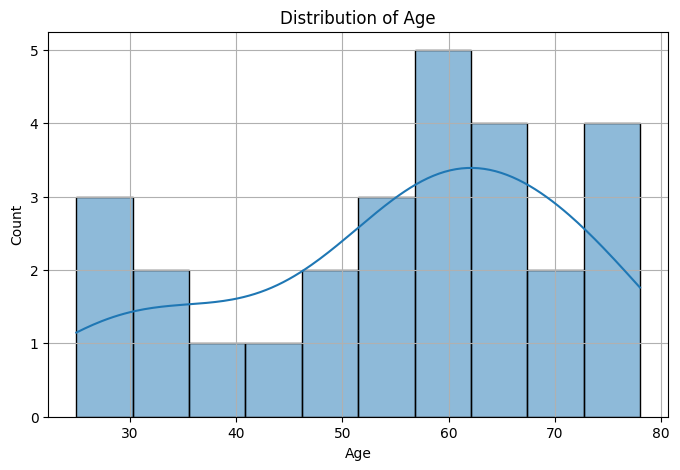

In [89]:
plt.figure(figsize=(8, 5))
sns.histplot(data=table_data, x='age', kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

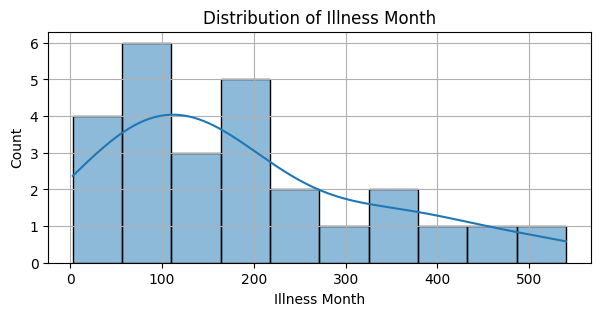

In [90]:
plt.figure(figsize=(7, 3))
sns.histplot(data=table_data, x='illnes_month', kde=True, bins=10)
plt.title('Distribution of Illness Month')
plt.xlabel('Illness Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [91]:
len(table_data)

27

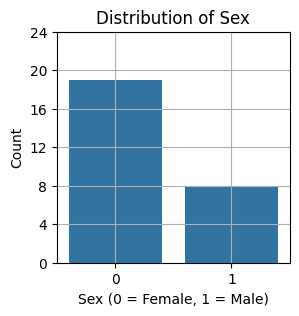

In [92]:
plt.figure(figsize=(3, 3))
sns.countplot(data=table_data, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.yticks(np.arange(0, len(table_data), 4.0))
plt.grid(True)
plt.show()

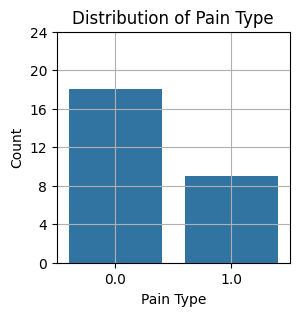

In [93]:
plt.figure(figsize=(3, 3))
sns.countplot(data=table_data[['patient_id','pain_type']].dropna(), x='pain_type')
plt.title('Distribution of Pain Type')
plt.xlabel('Pain Type')
plt.yticks(np.arange(0, len(table_data), 4.0))
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [94]:
table_data.head(4)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_beck,score_spilberg_person,score_spilberg_anxiety,...,theshold_edge_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right.1,theshold_edge_left.1,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,24.0,64.0,56.0,...,58,58,1,-0.6,-7.8,140.767500,178.163333,61,58,3.277778
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,8.0,43.0,42.0,...,33,33,1,6.2,23.8,66.661917,88.539167,26,33,3.277778
6,patient_ 7,1,63,0.0,96.0,9.0,28.0,3.0,29.0,22.0,...,48,48,1,20.7,4.1,79.481833,91.373333,48,48,3.277778
7,patient_ 8,0,48,0.0,120.0,4.0,10.0,21.0,58.0,42.0,...,46,46,1,-20.6,-1.0,67.640833,97.291667,54,46,3.277778


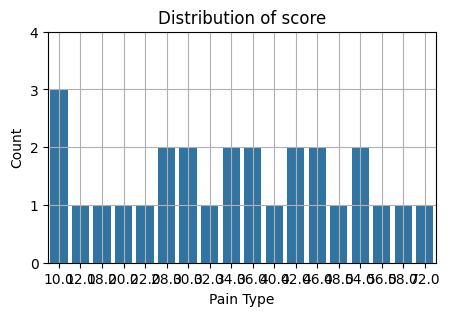

In [95]:
plt.figure(figsize=(5, 3))
sns.countplot(data=table_data, x='score_osvestri')
plt.title('Distribution of score')
plt.xlabel('Pain Type')
plt.yticks(np.arange(0, 5, 1.0))
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [96]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

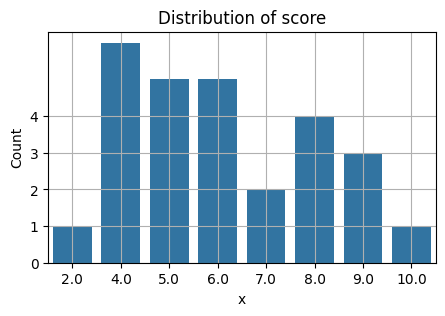

In [97]:
plt.figure(figsize=(5, 3))
sns.countplot(data=table_data, x='score_pain_reiting')
plt.title('Distribution of score')
plt.xlabel('x')
plt.yticks(np.arange(0, 5, 1.0))
plt.ylabel('Count')
plt.grid(True)
plt.show()

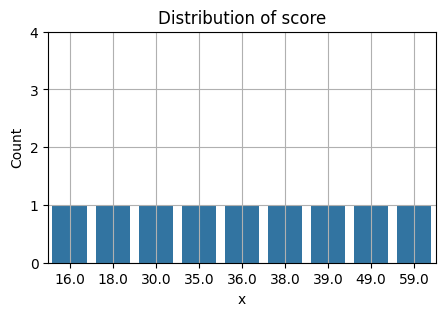

In [98]:
plt.figure(figsize=(5, 3))
sns.countplot(data=table_data[table_data['pain_type'] == 1.0], x='score_csi')
plt.title('Distribution of score')
plt.xlabel('x')
plt.yticks(np.arange(0, 5, 1.0))
plt.ylabel('Count')
plt.grid(True)
plt.show()

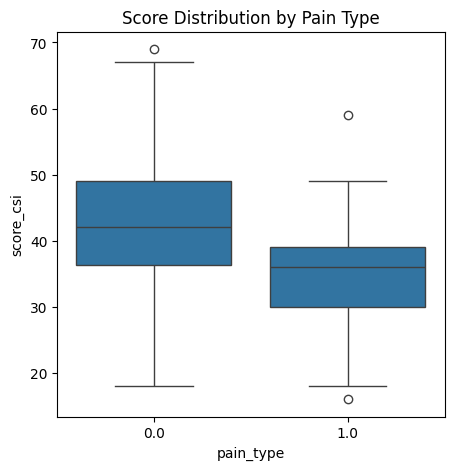

In [103]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='score_csi')
plt.title('Score Distribution by Pain Type')
plt.xlabel('pain_type')
plt.ylabel('score_csi')
plt.show()

In [104]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [107]:
table_data[table_data['pain_type']==0.0].describe()

,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_beck,score_spilberg_person,score_spilberg_anxiety,score_csi,...,theshold_edge_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right.1,theshold_edge_left.1,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
count,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,17.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.0,18.000000,18.000000,16.000000,16.000000,18.000000,18.000000,1.800000e+01
mean,0.388889,53.166667,0.0,170.166667,5.777778,32.333333,14.235294,47.555556,44.611111,41.944444,...,45.277778,45.277778,1.0,1.527778,2.133333,87.450929,119.911196,46.722222,45.277778,3.277778e+00
std,0.501631,18.509934,0.0,154.210799,2.101975,15.855969,7.487735,9.983647,10.583777,14.834270,...,10.010615,10.010615,0.0,15.570364,14.672102,24.393054,49.442930,10.139066,10.010615,4.569640e-16
min,0.000000,25.000000,0.0,3.000000,2.000000,10.000000,2.000000,27.000000,22.000000,18.000000,...,27.000000,27.000000,1.0,-21.000000,-28.800000,47.716706,64.550536,26.000000,27.000000,3.277778e+00
25%,0.000000,35.750000,0.0,69.000000,4.000000,20.500000,9.000000,41.500000,39.750000,36.250000,...,40.000000,40.000000,1.0,-7.650000,-4.875000,70.965938,88.056682,42.250000,40.000000,3.277778e+00
50%,0.000000,56.500000,0.0,120.000000,5.500000,33.000000,13.000000,52.000000,46.000000,42.000000,...,45.500000,45.500000,1.0,-0.150000,0.450000,80.438089,95.501786,45.000000,45.500000,3.277778e+00
75%,1.000000,66.000000,0.0,189.000000,7.500000,41.500000,19.000000,55.750000,50.500000,49.000000,...,48.750000,48.750000,1.0,10.925000,11.975000,112.572052,149.833698,51.750000,48.750000,3.277778e+00
max,1.000000,78.000000,0.0,540.000000,10.000000,72.000000,27.000000,58.000000,61.000000,69.000000,...,67.000000,67.000000,1.0,31.500000,23.800000,126.798090,229.881818,69.000000,67.000000,3.277778e+00


In [106]:
table_data[table_data['pain_type']==1.0].describe()

,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_beck,score_spilberg_person,score_spilberg_anxiety,score_csi,...,theshold_edge_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right.1,theshold_edge_left.1,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
count,9.000000,9.000000,9.0,8.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,0.111111,59.444444,1.0,220.500000,6.666667,40.666667,12.000000,49.555556,43.666667,35.555556,...,44.666667,44.666667,1.0,0.800000,1.844444,87.002165,87.141359,43.000000,44.666667,3.277778e+00
std,0.333333,8.748016,0.0,128.435643,1.802776,16.401219,7.211103,8.545629,9.604686,13.556466,...,10.641898,10.641898,0.0,17.828068,11.244789,34.908017,49.148470,10.271319,10.641898,4.710277e-16
min,0.000000,43.000000,1.0,60.000000,4.000000,10.000000,3.000000,35.000000,30.000000,16.000000,...,33.000000,33.000000,1.0,-21.200000,-7.800000,51.035754,38.425694,30.000000,33.000000,3.277778e+00
25%,0.000000,55.000000,1.0,114.000000,5.000000,30.000000,6.750000,45.000000,34.000000,30.000000,...,37.000000,37.000000,1.0,-9.600000,-6.500000,66.449074,55.834435,36.000000,37.000000,3.277778e+00
50%,0.000000,60.000000,1.0,204.000000,7.000000,42.000000,13.000000,50.000000,47.000000,36.000000,...,40.000000,40.000000,1.0,-3.900000,-3.100000,75.400923,70.664444,42.000000,40.000000,3.277778e+00
75%,0.000000,61.000000,1.0,333.000000,8.000000,54.000000,15.000000,53.000000,50.000000,39.000000,...,58.000000,58.000000,1.0,3.900000,9.100000,86.086944,79.635000,44.000000,58.000000,3.277778e+00
max,1.000000,72.000000,1.0,396.000000,9.000000,58.000000,24.000000,64.000000,56.000000,59.000000,...,59.000000,59.000000,1.0,32.800000,24.400000,149.541111,178.163333,61.000000,59.000000,3.277778e+00


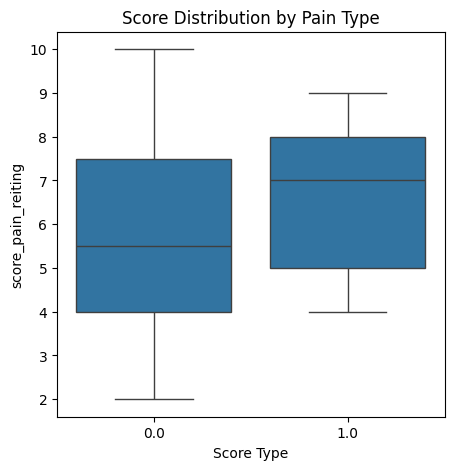

In [102]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='score_pain_reiting')
plt.title('Score Distribution by Pain Type')
plt.xlabel('Score Type')
plt.ylabel('score_pain_reiting')
plt.show()

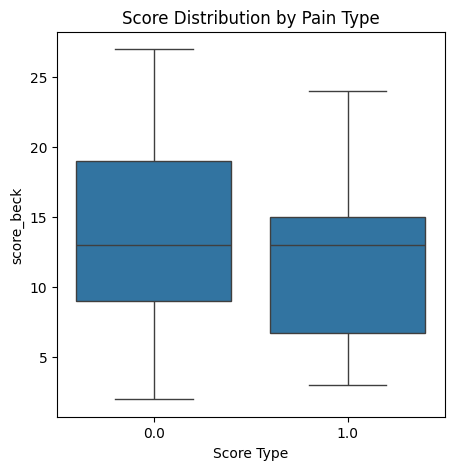

In [67]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='score_beck')
plt.title('Score Distribution by Pain Type')
plt.xlabel('Score Type')
plt.ylabel('score_beck')
plt.show()

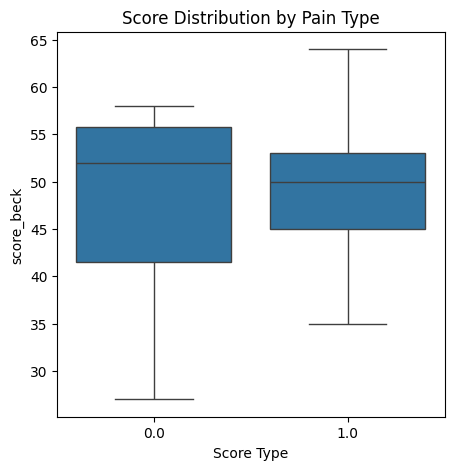

In [68]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='score_spilberg_person')
plt.title('Score Distribution by Pain Type')
plt.xlabel('Score Type')
plt.ylabel('score_spilberg_person')
plt.show()

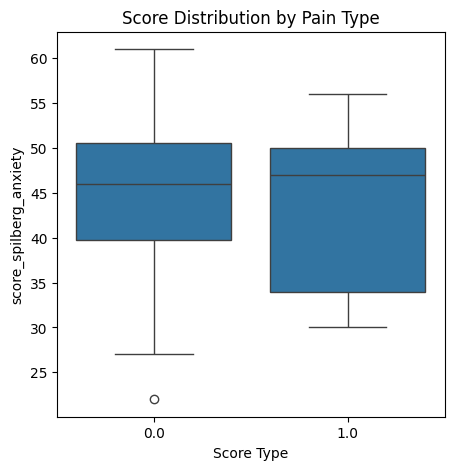

In [69]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='score_spilberg_anxiety')
plt.title('Score Distribution by Pain Type')
plt.xlabel('Score Type')
plt.ylabel('score_spilberg_anxiety')
plt.show()

## Visualize Patient Scores Correlation Heatmap

### Subtask:
Generate a correlation heatmap for the 'subset_score_columns' (excluding 'patient_id'). This will display the Pearson correlation coefficients between the various patient score metrics, highlighting their interrelationships.


**Reasoning**:
First, I will select the columns specified in `subset_score_columns` from the `table_data` DataFrame, excluding 'patient_id', to create a new DataFrame `score_data`. This prepares the data specifically for correlation analysis of patient scores.



In [21]:
score_data = table_data[subset_score_columns].drop('patient_id', axis=1)

print("Score data prepared for correlation analysis.")
print(score_data.head())

Score data prepared for correlation analysis.
    score_pain_reiting  score_osvestri  score_beck  score_spilberg_person  \
0                  9.0            58.0        24.0                   64.0   
3                  5.0            22.0         8.0                   43.0   
6                  9.0            28.0         3.0                   29.0   
7                  4.0            10.0        21.0                   58.0   
19                 6.0            46.0        10.0                   41.0   

    score_spilberg_anxiety  score_csi  
0                     56.0       59.0  
3                     42.0       19.0  
6                     22.0       20.0  
7                     42.0       42.0  
19                    38.0       37.0  


To visualize the interrelationships between patient score metrics, I will calculate the Pearson correlation matrix for `score_data` and then create a heatmap to display these correlations, annotating it with the correlation values and adding a descriptive title.



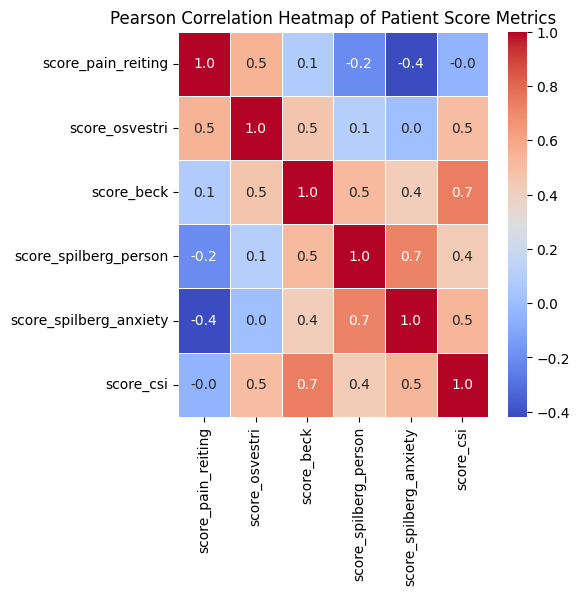

Correlation heatmap of patient score metrics generated.


In [22]:
correlation_matrix_scores = score_data.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_scores, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Pearson Correlation Heatmap of Patient Score Metrics')
plt.show()

print("Correlation heatmap of patient score metrics generated.")

## Visualize Diagnosis and Treatment data


In [23]:
diagnosis_data = table_data[subset_dignosis_columns].drop('patient_id', axis=1)
diagnosis_data = diagnosis_data.drop('tmdibular_pathology', axis=1)

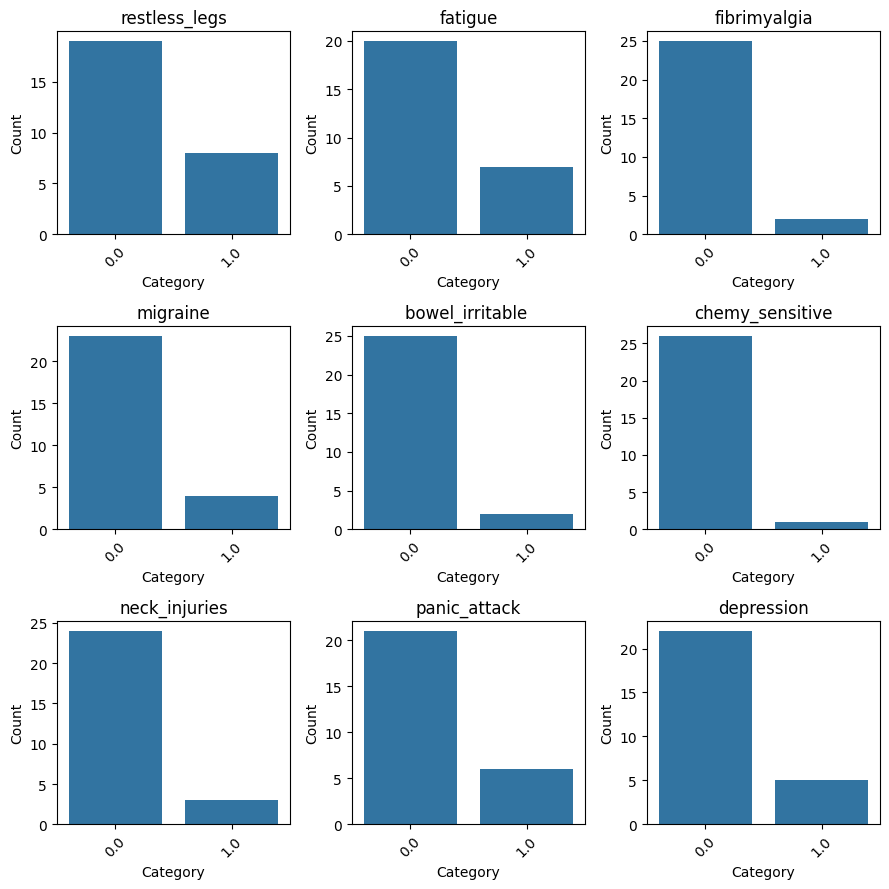

Countplots for diagnosis and treatment features generated.


In [24]:
import math

num_features = diagnosis_data.shape[1]
ncols = 3
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3 * ncols, 3 * nrows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(diagnosis_data.columns):
    sns.countplot(data=diagnosis_data, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Countplots for diagnosis and treatment features generated.")

In [25]:
therapy_data = table_data[subset_therapy_columns].drop('patient_id', axis=1)

num_features = therapy_data.shape[1]
ncols = 3
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3 * ncols, 3 * nrows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(therapy_data.columns):
    sns.countplot(data=therapy_data, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


KeyError: "['nsaid_drug', 'miorelax_drug', 'antidepress_drug', 'anticonv_drug', 'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'] not in index"

## Score clustering
Prepare the patient score data by creating a DataFrame from `table_data` using `patient_id` and the columns in `subset_score_columns`. Then, separate patients with any missing values in these score columns (excluding `patient_id`), assign them to a 'NaN_Cluster', and prepare the remaining patients with complete score data for K-Means clustering by dropping `patient_id`. Normalize this complete score data using `StandardScaler` to ensure all features contribute equally to the clustering process.

In [27]:
score_data_with_id = table_data[subset_score_columns]

In [28]:
nan_patients = score_data_with_id[score_data_with_id.drop('patient_id', axis=1).isnull().any(axis=1)].copy()
clean_patients = score_data_with_id.dropna(subset=score_data_with_id.drop('patient_id', axis=1).columns).copy()

# Assign 'NaN_Cluster' to patients with missing values
nan_patients['cluster'] = 'NaN_Cluster'

# Prepare clean data for clustering by dropping 'patient_id'
df_clustering_scores = clean_patients.drop('patient_id', axis=1)

print(f"Patients with missing values (NaN_Cluster): {len(nan_patients)}")
print(f"Patients with complete score data for clustering: {len(clean_patients)}")
print("First 5 rows of df_clustering_scores (clean data for clustering):")
print(df_clustering_scores.head())

Patients with missing values (NaN_Cluster): 2
Patients with complete score data for clustering: 25
First 5 rows of df_clustering_scores (clean data for clustering):
    score_pain_reiting  score_osvestri  score_beck  score_spilberg_person  \
0                  9.0            58.0        24.0                   64.0   
3                  5.0            22.0         8.0                   43.0   
6                  9.0            28.0         3.0                   29.0   
7                  4.0            10.0        21.0                   58.0   
19                 6.0            46.0        10.0                   41.0   

    score_spilberg_anxiety  score_csi  
0                     56.0       59.0  
3                     42.0       19.0  
6                     22.0       20.0  
7                     42.0       42.0  
19                    38.0       37.0  


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_scores = pd.DataFrame(scaler.fit_transform(df_clustering_scores), columns=df_clustering_scores.columns)


To group patients based on their scores, I will apply the K-Means clustering algorithm to the scaled data, as specified in the instructions. This involves instantiating KMeans, fitting it to the `df_scaled_scores` DataFrame, and extracting the cluster labels.



In [30]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans_scores = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the scaled score data
kmeans_scores.fit(df_scaled_scores)

# Get cluster labels
cluster_labels_scores = kmeans_scores.labels_

print(f"KMeans clustering performed with {n_clusters} clusters on score data.")
print(f"First 5 cluster labels: {cluster_labels_scores[:5]}")

KMeans clustering performed with 3 clusters on score data.
First 5 cluster labels: [2 0 0 1 0]


In [31]:
clean_patients['cluster'] = cluster_labels_scores

Consolidate all patient data, including those with missing values and those successfully clustered, I will concatenate the `nan_patients` and `clean_patients` DataFrames. This step ensures that all patients are accounted for, with their respective cluster assignments or 'NaN_Cluster' designation, providing a comprehensive dataset for further analysis.



In [32]:
all_patients_clustered = pd.concat([clean_patients, nan_patients], ignore_index=True)

print("All patients, including those with and without missing values, are now combined with cluster assignments.")
print(all_patients_clustered.head())

All patients, including those with and without missing values, are now combined with cluster assignments.
    patient_id  score_pain_reiting  score_osvestri  score_beck  \
0   patient_ 1                 9.0            58.0        24.0   
1   patient_ 4                 5.0            22.0         8.0   
2   patient_ 7                 9.0            28.0         3.0   
3   patient_ 8                 4.0            10.0        21.0   
4  patient_ 20                 6.0            46.0        10.0   

   score_spilberg_person  score_spilberg_anxiety  score_csi cluster  
0                   64.0                    56.0       59.0       2  
1                   43.0                    42.0       19.0       0  
2                   29.0                    22.0       20.0       0  
3                   58.0                    42.0       42.0       1  
4                   41.0                    38.0       37.0       0  


In [33]:
all_patients_clustered = all_patients_clustered.rename(columns={'cluster': 'Score_cluster'})

print("Column 'cluster' renamed to 'Score_cluster'.")
print(all_patients_clustered[['patient_id', 'Score_cluster']].head())

Column 'cluster' renamed to 'Score_cluster'.
    patient_id Score_cluster
0   patient_ 1             2
1   patient_ 4             0
2   patient_ 7             0
3   patient_ 8             1
4  patient_ 20             0


In [34]:
print("Distribution of patients across Score_clusters:")
print(all_patients_clustered['Score_cluster'].value_counts())

Distribution of patients across Score_clusters:
Score_cluster
0              9
2              8
1              8
NaN_Cluster    2
Name: count, dtype: int64


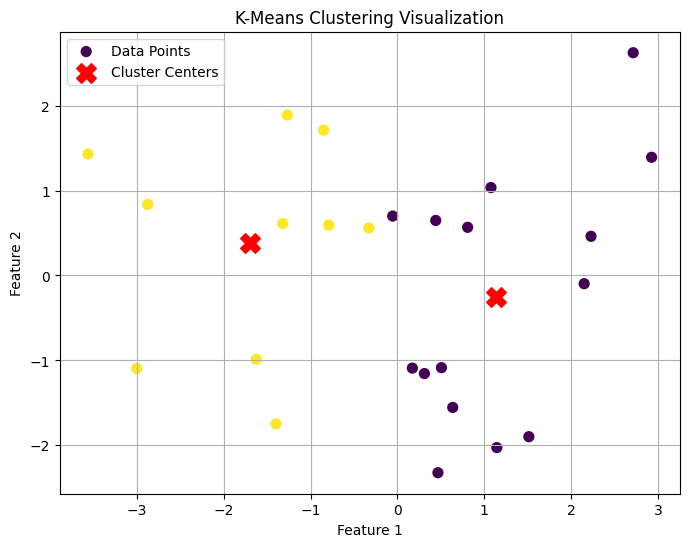

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Or 3 for 3D visualization
principal_components = pca.fit_transform(df_scaled_scores)
pca_score_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10) # n_init for robust initialization

kmeans.fit(np.array(pca_score_df))
labels = kmeans.predict(np.array(pca_score_df))
cluster_centers = kmeans.cluster_centers_


# 3. Create the Scatter Plot
plt.figure(figsize=(8, 6))

# Plot data points, colored by cluster label
plt.scatter(np.array(pca_score_df)[:, 0], np.array(pca_score_df)[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')


# 4. Add Labels and Title
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
pca.explained_variance_ratio_

array([0.47686053, 0.30716749])

#Case 1: Linear Regression model

In [37]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [38]:
#LPRM linear probabolity Regression Model

# it's a target for LPRM
#'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'
# 'avg_avg_respone_right','avg_avg_respone_left'
table_data_LPRM_columns = [
       'patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right', 'motor_evoked_left',
       'avg_respone_right', 'avg_respone_left',
       'theshold_edge_right', 'theshold_edge_left',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'

]

table_data_LPRM = table_data[table_data_LPRM_columns]

KeyError: "['score_dn4', 'score_paint_detect', 'score_pittsburg', 'score_mak_gill', 'nsaid_drug', 'miorelax_drug', 'antidepress_drug', 'anticonv_drug', 'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'] not in index"

In [40]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col, summary_params
from scipy.stats import f
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.iolib.summary2 import summary_col, summary_params

In [ ]:
# число пропусков по каждой переменной
missing_values = table_data_LPRM.isna().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(13, 5))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Missing Values per Column in table_data_LPRM')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## strategy 1: drop all NaN

In [ ]:
table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM = table_data_LPRM.dropna()
#сбросим индекс DataFrame после удаления строк со значениями NaN
table_data_LPRM = table_data_LPRM.reset_index(drop=True)
table_data_LPRM.shape

In [ ]:
# Convert relevant columns to numeric, handling comma decimal separators
for col in table_data_LPRM.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data_LPRM[col] = table_data_LPRM[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data_LPRM[col] = pd.to_numeric(table_data_LPRM[col], errors='coerce')

y = table_data_LPRM['avg_avg_respone_right'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['patient_id', 'avg_avg_respone_right']
X = add_constant(table_data_LPRM.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))


In [ ]:
df = table_data_LPRM[table_data_LPRM['patient_id'] != 'patient_34']
df = df.reset_index(drop=True)
table_data_LPRM = df
print(f"Row for patient_34 dropped. New shape: {table_data_LPRM.shape}")

In [ ]:
#table_data_LPRM has a 34 and 35 patient the same. Drop it

plt.figure(figsize=(7, 7))
sns.scatterplot(data=table_data_LPRM, x='avg_avg_respone_left', y='avg_avg_respone_right')

# Add labels for patient_id
for i, row in table_data_LPRM.iterrows():
    plt.text(row['avg_avg_respone_left'] + 0.5, row['avg_avg_respone_right'] + 0.5,
             row['patient_id'], fontsize=12, alpha=0.7)

plt.title('Scatter Plot of Avg Responses Right and Left with Patient IDs')
plt.xlabel('Average Response Left')
plt.ylabel('Average Response Right')
plt.grid(True)
plt.show()

## Strategy 2: Try to find regression over TMS stiumulus

In [43]:
table_data_LPRM = table_data
#table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM = table_data_LPRM.dropna()
#сбросим индекс DataFrame после удаления строк со значениями NaN
table_data_LPRM = table_data_LPRM.reset_index(drop=True)

# Convert relevant columns to numeric, handling comma decimal separators
for col in table_data_LPRM.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data_LPRM[col] = table_data_LPRM[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data_LPRM[col] = pd.to_numeric(table_data_LPRM[col], errors='coerce')

In [44]:
table_data_LPRM.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [45]:
table_data_LPRM_TMS_stimul_columns = [
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'
       ]

In [57]:
table_data_LPRM.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [46]:
table_data_LPRM_TMS_stimul = table_data_LPRM[table_data_LPRM_TMS_stimul_columns]

In [56]:
#y = table_data_LPRM_TMS_stimul['avg_avg_respone_right'] # dependent variable
y = table_data['pain_type']

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['pain_type']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

ValueError: The indices for endog and exog are not aligned

In [48]:
# f-test и P-value
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)


(np.float64(5.724), np.float64(0.003))

In [49]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)

np.float64(2.214)

Hypothesys: regression is valid.
f_test = 8.839
f_critical = 3.282
f_test > f_critical  -> Hypothesis rejected!

In [ ]:
table_data

In [51]:
y = table_data['pain_type'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_avg_respone_left']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

ValueError: The indices for endog and exog are not aligned

In [ ]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

In [ ]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)


Hypothesys: regression is valid.
f_test = 3.732
f_critical = 3.282
f_test > f_critical  -> Hypothesis rejected!

In [ ]:
table_data_LPRM_TMS_stimul.columns

In [ ]:
y = table_data_LPRM_TMS_stimul['avg_inhibition_threshold_right'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_inhibition_threshold_right']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

In [ ]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

In [ ]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)

In [ ]:
y = table_data_LPRM_TMS_stimul['avg_inhibition_threshold_left'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_inhibition_threshold_left']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

In [ ]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

## Strategy 3: fill NaN - working

# Case 2: Correlation average TMS response and Medical dataset values
Analyze the correlation between categorical features and the numerical variables 'avg_avg_respone_right' and 'avg_avg_respone_left' in the `tabel_data` DataFrame. This involves converting relevant columns to a numeric data type, identifying categorical features (excluding 'patient_id'), calculating Pearson correlation matrices, and visualizing these correlations using heatmaps. Finally, summarize the key findings from the correlation analysis.

In [39]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_timeseries_clusters.csv'

table_data_LPRM = pd.read_csv(link_url, sep = ',')
table_data_LPRM = table_data_LPRM.drop('Unnamed: 0',axis=1)
table_data_LPRM.head(5)

,patient_id,Avg_Resp_Left_Mean,Avg_Resp_Left_Std,Avg_Resp_Left_Hurst,Avg_Resp_Right_Mean,Avg_Resp_Right_Std,Avg_Resp_Right_Hurst,Avg_Resp_DTW_Cluster,Avg_Resp_DWT_Cluster,Inh_Thresh_DTW_Cluster,Inh_Thresh_DWT_Cluster,pain_type
0,patient_ 1n,53.259528,12.009135,0.397920,194.736574,40.132561,1.917325,0,1,3,1,2.0
1,patient_ 2n,123.597025,41.771269,1.163941,109.284255,41.218117,1.462129,1,1,1,1,2.0
2,patient_ 3n,39.701583,21.652062,1.099086,84.205208,32.102390,1.186651,3,0,1,1,2.0
3,patient_ 4n,73.540167,23.046395,0.802684,64.819444,13.978575,1.351294,1,0,1,1,2.0
4,patient_ 5n,100.746296,14.629567,0.809085,38.125000,10.383945,0.789748,1,0,1,2,2.0


In [40]:
merged_df = []
merged_df = pd.merge(table_data_LPRM,
                     all_patients_clustered[['patient_id', 'Score_cluster']],
                     on='patient_id', how='left')

merged_df = pd.merge(merged_df,
                     table_data[subset_dignosis_columns],
                     on='patient_id', how='left')

merged_df = pd.merge(merged_df,
                     table_data[subset_patient_columns].drop('pain_type',axis=1),
                     on='patient_id', how='left')

#merged_df = pd.merge(merged_df,
#                     table_data[subset_therapy_columns],
#                     on='patient_id', how='left')

print("DataFrames merged successfully. First 5 rows of merged_df:")
print(merged_df.head())

DataFrames merged successfully. First 5 rows of merged_df:
    patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
0  patient_ 1n           53.259528          12.009135             0.397920   
1  patient_ 2n          123.597025          41.771269             1.163941   
2  patient_ 3n           39.701583          21.652062             1.099086   
3  patient_ 4n           73.540167          23.046395             0.802684   
4  patient_ 5n          100.746296          14.629567             0.809085   

   Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  \
0           194.736574           40.132561              1.917325   
1           109.284255           41.218117              1.462129   
2            84.205208           32.102390              1.186651   
3            64.819444           13.978575              1.351294   
4            38.125000           10.383945              0.789748   

   Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  Inh_Thresh_DTW_C

In [41]:
merged_df.columns

Index(['patient_id', 'Avg_Resp_Left_Mean', 'Avg_Resp_Left_Std',
       'Avg_Resp_Left_Hurst', 'Avg_Resp_Right_Mean', 'Avg_Resp_Right_Std',
       'Avg_Resp_Right_Hurst', 'Avg_Resp_DTW_Cluster', 'Avg_Resp_DWT_Cluster',
       'Inh_Thresh_DTW_Cluster', 'Inh_Thresh_DWT_Cluster', 'pain_type',
       'Score_cluster', 'restless_legs', 'fatigue', 'fibrimyalgia',
       'tmdibular_pathology', 'migraine', 'bowel_irritable ',
       'chemy_sensitive', 'neck_injuries', 'panic_attack', 'depression', 'sex',
       'age', 'illnes_month'],
      dtype='object')

In [42]:
merged_df = merged_df.dropna(axis=0)
#merged_df = merged_df.fillna(-1)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 17 to 60
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_id              24 non-null     object 
 1   Avg_Resp_Left_Mean      24 non-null     float64
 2   Avg_Resp_Left_Std       24 non-null     float64
 3   Avg_Resp_Left_Hurst     24 non-null     float64
 4   Avg_Resp_Right_Mean     24 non-null     float64
 5   Avg_Resp_Right_Std      24 non-null     float64
 6   Avg_Resp_Right_Hurst    24 non-null     float64
 7   Avg_Resp_DTW_Cluster    24 non-null     int64  
 8   Avg_Resp_DWT_Cluster    24 non-null     int64  
 9   Inh_Thresh_DTW_Cluster  24 non-null     int64  
 10  Inh_Thresh_DWT_Cluster  24 non-null     int64  
 11  pain_type               24 non-null     float64
 12  Score_cluster           24 non-null     object 
 13  restless_legs           24 non-null     float64
 14  fatigue                 24 non-null     float64


In [44]:
merged_df = merged_df.drop('tmdibular_pathology', axis=1)

In [45]:
#merged_df.columns = merged_df.columns.str.strip()

In [46]:
merged_df['Score_cluster'] = pd.to_numeric(merged_df['Score_cluster'], errors='coerce')
print("'Score_cluster' column converted to numeric type, non-numeric values coerced to NaN.")
print(merged_df[['patient_id', 'Score_cluster']].head())

'Score_cluster' column converted to numeric type, non-numeric values coerced to NaN.
     patient_id  Score_cluster
17   patient_ 1            2.0
20   patient_ 4            0.0
23   patient_ 7            0.0
24   patient_ 8            1.0
35  patient_ 20            0.0


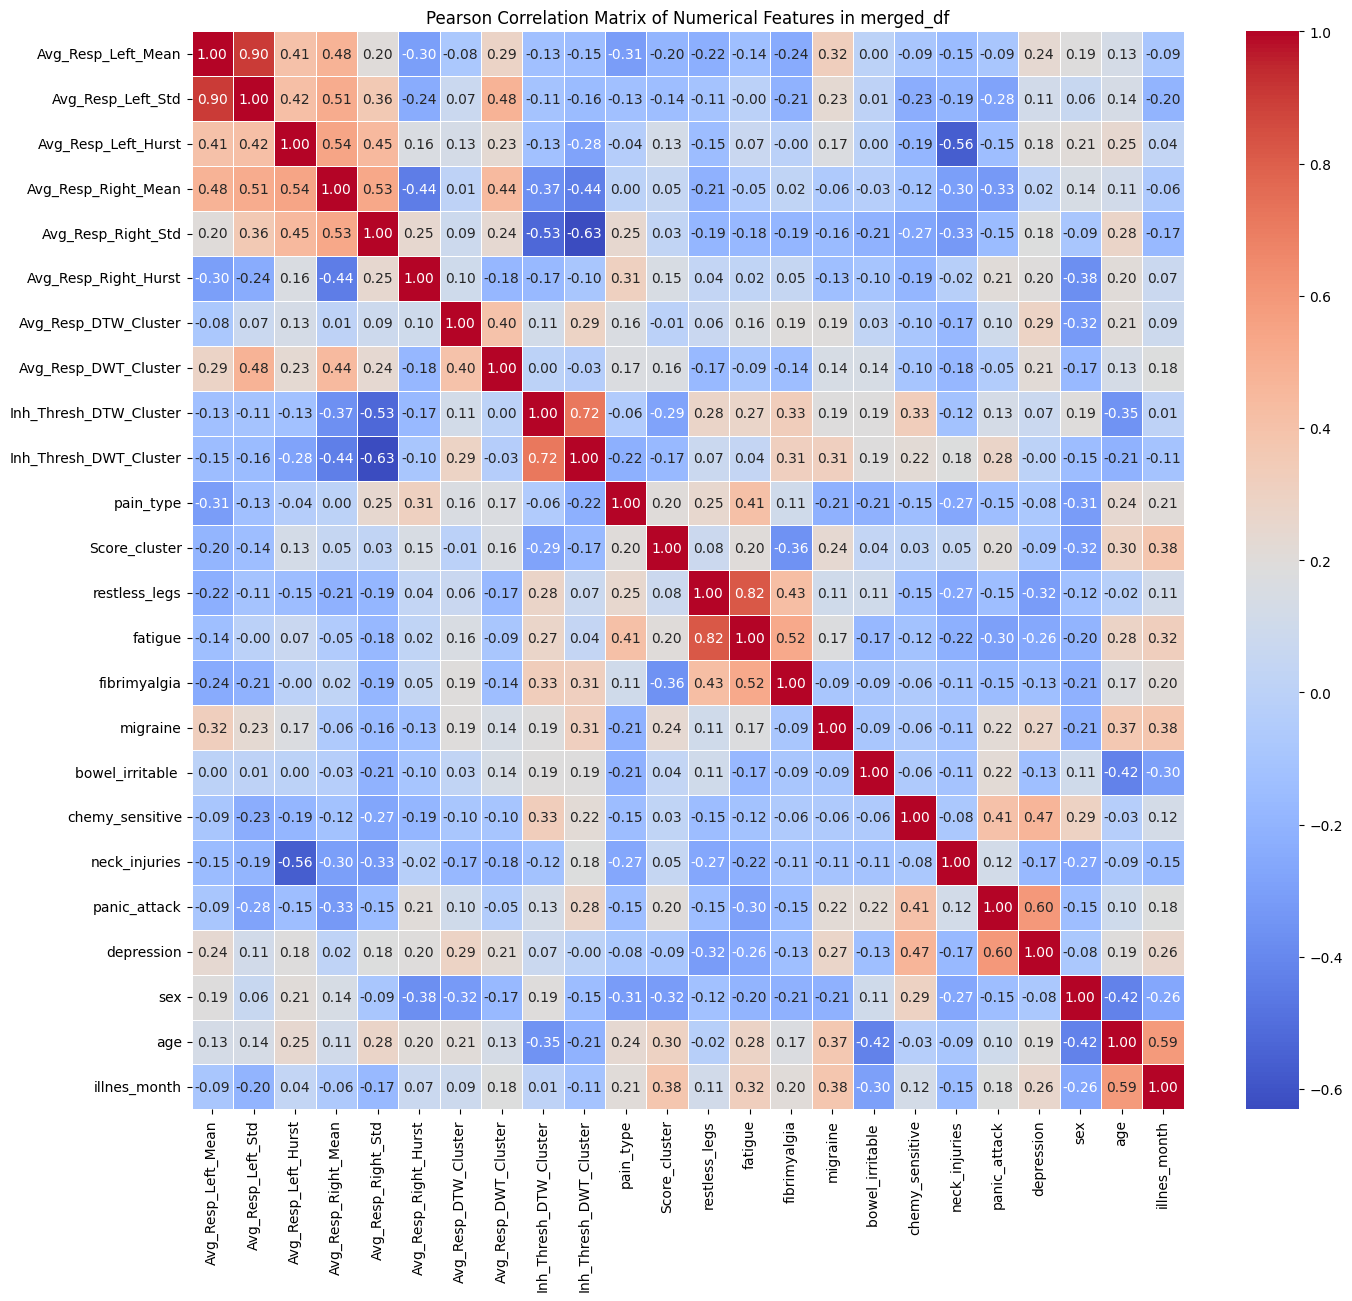

Pearson correlation matrix heatmap generated for numerical features.


In [47]:
numerical_cols = merged_df.select_dtypes(include=np.number).columns
correlation_matrix = merged_df[numerical_cols].corr(method='pearson')

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Numerical Features in merged_df')
plt.show()

print("Pearson correlation matrix heatmap generated for numerical features.")

In [48]:
merged_df.to_csv('tms_automl_date.csv')

In [49]:
df_clustering_pca = []
df_clustering_pca = merged_df.copy()
#df_clustering_pca = df_clustering_pca.drop(['patient_id'], axis=1)


for col in df_clustering_pca.columns:
    if df_clustering_pca[col].isnull().any():
        df_clustering_pca[col] = df_clustering_pca[col].fillna(df_clustering_pca[col].mean())

print("df_clustering_pca DataFrame prepared: 'patient_id' columns dropped, missing values imputed with mean.")
print(df_clustering_pca.head())

df_clustering_pca DataFrame prepared: 'patient_id' columns dropped, missing values imputed with mean.
     patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
17   patient_ 1          178.163333          67.882676             1.257902   
20   patient_ 4           88.539167          29.056679             0.237006   
23   patient_ 7           91.373333          28.543993             1.572665   
24   patient_ 8           97.291667          16.593753             0.885662   
35  patient_ 20          229.881818          58.727715             2.000000   

    Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  \
17           140.767500           27.082901              0.291345   
20            66.661917           16.158868              0.504025   
23            79.481833           24.261729              0.606449   
24            67.640833            6.595104              1.308931   
35           126.798090           27.734369              0.907730   

    Avg_

Use `StandardScaler` to normalize range and Principal Component Analysis (PCA) to reduce the dimensionality of the scaled data, retaining components that cumulatively explain at least 95% of the total variance, to simplify the dataset while preserving most of its information for clustering.



In [50]:
for col in df_clustering_pca.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        df_clustering_pca[col] = df_clustering_pca[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        df_clustering_pca[col] = pd.to_numeric(df_clustering_pca[col], errors='coerce')

        # Impute missing values with the mean if any NaNs are present after conversion
        #if table_data[col].isnull().any():
        #    table_data[col] = table_data[col].fillna(table_data[col].mean())

print("table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.")
print(df_clustering_pca.head())

table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.
     patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
17   patient_ 1          178.163333          67.882676             1.257902   
20   patient_ 4           88.539167          29.056679             0.237006   
23   patient_ 7           91.373333          28.543993             1.572665   
24   patient_ 8           97.291667          16.593753             0.885662   
35  patient_ 20          229.881818          58.727715             2.000000   

    Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  \
17           140.767500           27.082901              0.291345   
20            66.661917           16.158868              0.504025   
23            79.481833           24.261729              0.606449   
24            67.640833            6.595104              1.308931   
35           126.798090           27.734369  

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
df_clustering_pca = df_clustering_pca.drop(['patient_id'], axis=1)
df_clustering_pca = df_clustering_pca.fillna(method='ffill')
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_clustering_pca), columns=df_clustering_pca.columns)
print("Data scaled using StandardScaler.")

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95) # Retain components that explain 95% of the variance
df_pca_reduced = pca.fit_transform(df_scaled_pca)

# Convert to DataFrame for easier inspection, if needed
df_pca_reduced = pd.DataFrame(df_pca_reduced)

print(f"Original number of features: {df_scaled_pca.shape[1]}")
print(f"Reduced number of features after PCA (95% variance retained): {df_pca_reduced.shape[1]}")
print("PCA dimensionality reduction complete. Reduced data head:")
#print(df_pca_reduced.head())

Data scaled using StandardScaler.
Original number of features: 24
Reduced number of features after PCA (95% variance retained): 14
PCA dimensionality reduction complete. Reduced data head:


/tmp/ipython-input-3236260132.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clustering_pca = df_clustering_pca.fillna(method='ffill')


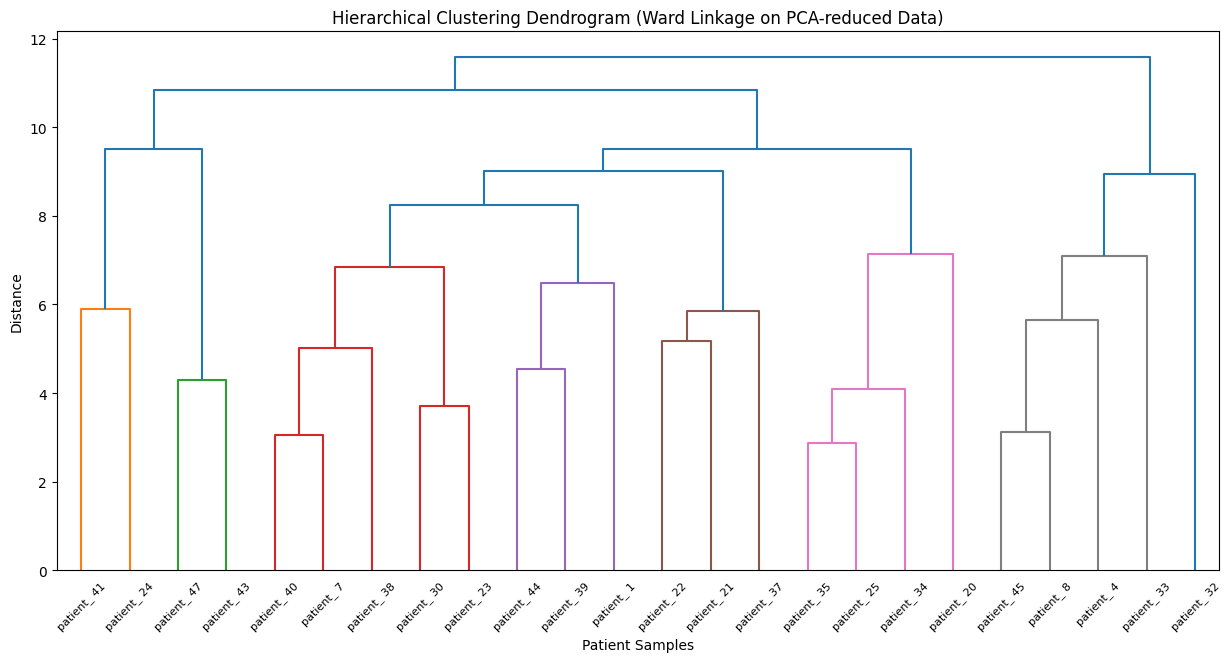

Dendrogram with 'ward' linkage on PCA-reduced data generated.


In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get patient_ids for labeling the dendrogram
patient_ids_for_dendrogram = merged_df['patient_id'].tolist()

# Generate the linkage matrix using 'ward' method on the PCA-reduced data
linked_ward_pca = linkage(df_pca_reduced, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked_ward_pca,
           orientation='top',
           labels=patient_ids_for_dendrogram,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage on PCA-reduced Data)')
plt.xlabel('Patient Samples')
plt.ylabel('Distance')
plt.show()

print("Dendrogram with 'ward' linkage on PCA-reduced data generated.")

# Clustering for score and diagnosis

In [53]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [54]:
table_data = table_data.drop('avg_interstimul_threshod', axis=1)

In [55]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'],
      dtype='object')

In [56]:
score_columns = [
       'patient_id','pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi'
]

'''
score_columns = [
       'patient_id','pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi', 'score_mak_gill'
]
'''

"\nscore_columns = [\n       'patient_id','pain_type', 'illnes_month',\n       'score_pain_reiting', 'score_osvestri', 'score_dn4',\n       'score_paint_detect', 'score_beck', 'score_spilberg_person',\n       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi', 'score_mak_gill'\n]\n"

In [57]:
table_data_score = table_data[score_columns]
df_clustering = table_data_score.drop('patient_id', axis=1).copy()

In [58]:
for col in df_clustering.columns:
    if df_clustering[col].isnull().any():
        df_clustering[col] = df_clustering[col].fillna(df_clustering[col].mean())

print("Missing values handled by mean imputation.")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

#print("Data scaled using StandardScaler.")
#print(df_scaled.head())

Missing values handled by mean imputation.


Use techniques like the Elbow method or Silhouette score to find a suitable number of clusters for the chosen clustering algorithm.


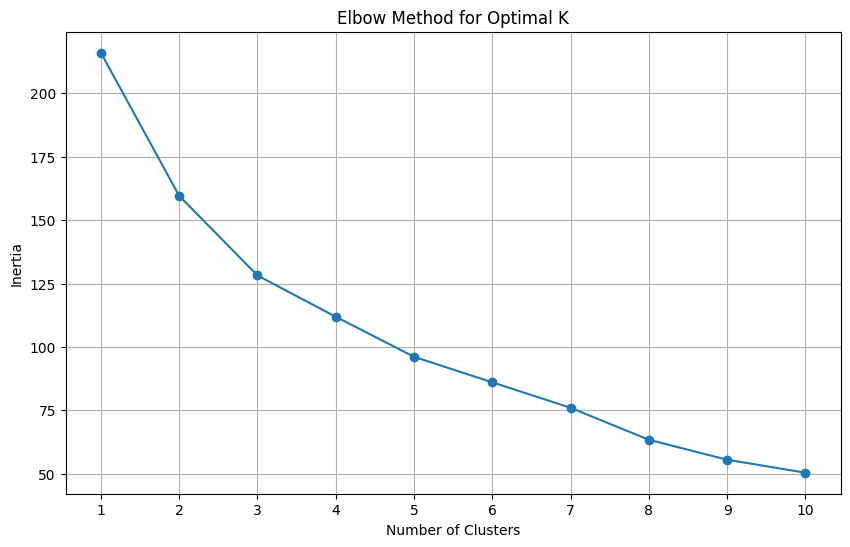

Elbow method plot generated.


In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

# Loop through a range of potential cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow method plot generated.")

Based on the Elbow method plot, the optimal number of clusters appears to be **3 or 4**, as this is where the rate of decrease in inertia significantly slows down, forming an 'elbow' shape. Beyond this point, adding more clusters does not significantly improve the model fit.



## Perform clustering
Apply a clustering algorithm (e.g., K-Means) to the prepared data to group patients.


In [60]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original tabel_data DataFrame
table_data['cluster'] = cluster_labels

print(f"KMeans clustering performed with {n_clusters} clusters.")
print("First 5 rows of tabel_data with new 'cluster' column:")
print(table_data[['patient_id', 'cluster']].head())

KMeans clustering performed with 3 clusters.
First 5 rows of tabel_data with new 'cluster' column:
     patient_id  cluster
0    patient_ 1        0
3    patient_ 4        2
6    patient_ 7        2
7    patient_ 8        1
19  patient_ 20        2


The scatter plot displays the patient clusters in a 2D space, reduced using Principal Component Analysis (PCA). Each point represents a patient, colored according to their assigned cluster.

**Key Observations from the Visualization:**

*   **Cluster Separation:** The three clusters appear to have some degree of separation, indicating that the K-Means algorithm successfully grouped patients with similar characteristics based on their score and diagnosis features.
*   **Patient Distribution:** Within each cluster, individual patients are labeled with their `patient_id`, `pain_type`, and `illnes_month`. This allows for a granular inspection of the characteristics of patients belonging to specific clusters.
*   **Pain Type and Illness Month:** While a clear pattern is not immediately obvious for `pain_type` and `illnes_month` across all clusters from a high-level view, a closer look at specific clusters might reveal tendencies. For example, some clusters might contain a higher proportion of patients with a particular pain type or a narrower range of illness duration.

**Next Steps for Visualization:**

*   Further analysis could involve calculating the average characteristics of `pain_type` and `illnes_month` (and other original features) for each cluster to quantitatively describe what defines each group. This would provide deeper insights into the clinical relevance of each cluster.

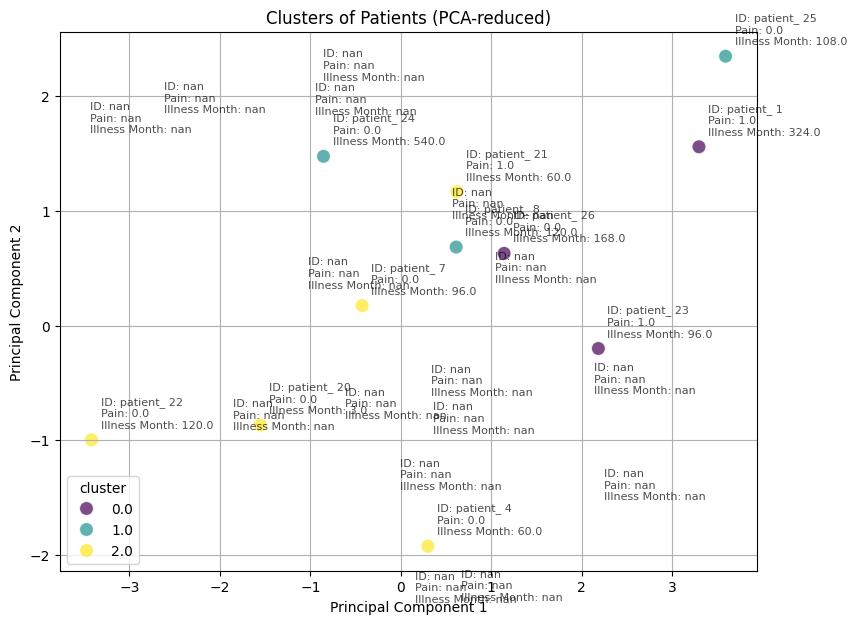

In [61]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add cluster labels and relevant original features back for plotting
df_pca['cluster'] = table_data['cluster']
df_pca['patient_id'] = table_data['patient_id']
df_pca['pain_type'] = table_data['pain_type']
df_pca['illnes_month'] = table_data['illnes_month']

plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='viridis',
    data=df_pca,
    legend='full',
    s=100,
    alpha=0.7
)

# Add labels for patient_id, pain_type, and illnes_month
for i, row in df_pca.iterrows():
    plt.text(row['PC1'] + 0.1, row['PC2'] + 0.1,
             f"ID: {row['patient_id']}\nPain: {row['pain_type']}\nIllness Month: {row['illnes_month']}",
             fontsize=8, alpha=0.7)

plt.title('Clusters of Patients (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Dendrogram clustering

In [62]:
df_clustering_pca = table_data.copy()
df_clustering_pca = df_clustering_pca.drop(['patient_id', 'cluster'], axis=1)


for col in df_clustering_pca.columns:
    if df_clustering_pca[col].isnull().any():
        df_clustering_pca[col] = df_clustering_pca[col].fillna(df_clustering_pca[col].mean())

print("df_clustering_pca DataFrame prepared: 'patient_id' and 'cluster' columns dropped, missing values imputed with mean.")
print(df_clustering_pca.head())

df_clustering_pca DataFrame prepared: 'patient_id' and 'cluster' columns dropped, missing values imputed with mean.
    sex  age  pain_type  illnes_month  score_pain_reiting  score_osvestri  \
0     0   72        1.0         324.0                 9.0            58.0   
3     0   25        0.0          60.0                 5.0            22.0   
6     1   63        0.0          96.0                 9.0            28.0   
7     0   48        0.0         120.0                 4.0            10.0   
19    1   51        0.0           3.0                 6.0            46.0   

    score_beck  score_spilberg_person  score_spilberg_anxiety  score_csi  ...  \
0         24.0                   64.0                    56.0       59.0  ...   
3          8.0                   43.0                    42.0       19.0  ...   
6          3.0                   29.0                    22.0       20.0  ...   
7         21.0                   58.0                    42.0       42.0  ...   
19        10.0  

Use `StandardScaler` to normalize range and Principal Component Analysis (PCA) to reduce the dimensionality of the scaled data, retaining components that cumulatively explain at least 95% of the total variance, to simplify the dataset while preserving most of its information for clustering.



In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_clustering_pca), columns=df_clustering_pca.columns)
print("Data scaled using StandardScaler.")

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95) # Retain components that explain 95% of the variance
df_pca_reduced = pca.fit_transform(df_scaled_pca)

# Convert to DataFrame for easier inspection, if needed
df_pca_reduced = pd.DataFrame(df_pca_reduced)

print(f"Original number of features: {df_scaled_pca.shape[1]}")
print(f"Reduced number of features after PCA (95% variance retained): {df_pca_reduced.shape[1]}")
print("PCA dimensionality reduction complete. Reduced data head:")
#print(df_pca_reduced.head())

Data scaled using StandardScaler.
Original number of features: 36
Reduced number of features after PCA (95% variance retained): 16
PCA dimensionality reduction complete. Reduced data head:


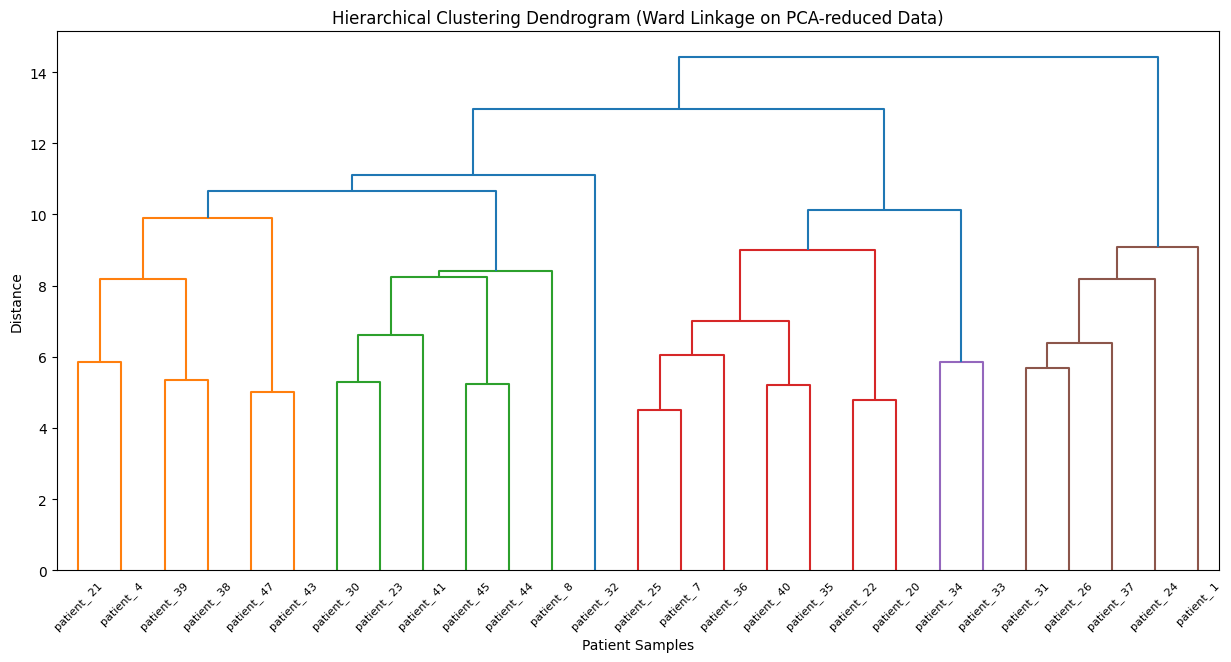

Dendrogram with 'ward' linkage on PCA-reduced data generated.


In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get patient_ids for labeling the dendrogram
patient_ids_for_dendrogram = table_data['patient_id'].tolist()

# Generate the linkage matrix using 'ward' method on the PCA-reduced data
linked_ward_pca = linkage(df_pca_reduced, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked_ward_pca,
           orientation='top',
           labels=patient_ids_for_dendrogram,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage on PCA-reduced Data)')
plt.xlabel('Patient Samples')
plt.ylabel('Distance')
plt.show()

print("Dendrogram with 'ward' linkage on PCA-reduced data generated.")

In [65]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left',
       'cluster'],
      dtype='object')

In [66]:
diagnosis_columns = ['patient_id', 'cluster',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression','nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'
]

In [67]:
table_data_diagnosis = table_data[diagnosis_columns]

KeyError: "['nsaid_drug', 'miorelax_drug', 'antidepress_drug', 'anticonv_drug', 'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'] not in index"

In [ ]:
# Identify numerical and categorical columns, excluding 'patient_id' and 'cluster'
all_columns = table_data_diagnosis.columns.tolist()
columns_to_exclude = ['patient_id', 'cluster']

features_for_profiling = [col for col in all_columns if col not in columns_to_exclude]

numerical_features = table_data[features_for_profiling].select_dtypes(include=np.number).columns.tolist()
categorical_features = table_data[features_for_profiling].select_dtypes(include='object').columns.tolist()

# Handle the special case of 'sex' if it's considered categorical but is numeric (0/1)
# We'll treat 0/1 columns as categorical if they are not already in categorical_features list
for col in numerical_features:
    unique_vals = table_data[col].dropna().unique()
    if len(unique_vals) <= 5 and all(val in [0, 1] for val in unique_vals):
        categorical_features.append(col)
        numerical_features.remove(col)


# Group by cluster and calculate mean for numerical features
numerical_cluster_profile = table_data.groupby('cluster')[numerical_features].mean()
#print("\nNumerical Feature Profile per Cluster (Mean):")
#print(numerical_cluster_profile)

# For categorical features, count occurrences within each cluster
#print("\nCategorical Feature Profile per Cluster (Value Counts/Proportions):")
for col in categorical_features:
#    print(f"\n--- {col} ---")
    counts = table_data.groupby('cluster')[col].value_counts(normalize=True).unstack(fill_value=0)
#    print(counts)


In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(numerical_cluster_profile.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Numerical Feature Profile per Cluster (Mean)')
plt.xlabel('Cluster')
plt.ylabel('Numerical Feature')
plt.show()

### Visualize Clusters with a Dendrogram
Dendrogram method calculates the average distance between all pairs of observations in two clusters before merging them. This can sometimes produce more balanced dendrograms and offer a different perspective on cluster formation compared to the 'ward' method, which minimizes the variance within each cluster.


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using 'average' method
linked_average = linkage(df_scaled, method='ward')

plt.figure(figsize=(13, 5))
dendrogram(linked_average,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Patient Samples')
plt.ylabel('Distance')
plt.show()

print("Dendrogram with 'average' linkage generated.")

# Check statistical significance

In [108]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_timeseries_clusters.csv'

df = pd.read_csv(link_url, sep = ',')
df = df.drop('Unnamed: 0', axis=1)
df.head(5)


,patient_id,Avg_Resp_Left_Mean,Avg_Resp_Left_Std,Avg_Resp_Left_Hurst,Avg_Resp_Right_Mean,Avg_Resp_Right_Std,Avg_Resp_Right_Hurst,Avg_Resp_DTW_Cluster,Avg_Resp_DWT_Cluster,Inh_Thresh_DTW_Cluster,Inh_Thresh_DWT_Cluster,pain_type
0,patient_ 1n,53.259528,12.009135,0.397920,194.736574,40.132561,1.917325,0,1,3,1,2.0
1,patient_ 2n,123.597025,41.771269,1.163941,109.284255,41.218117,1.462129,1,1,1,1,2.0
2,patient_ 3n,39.701583,21.652062,1.099086,84.205208,32.102390,1.186651,3,0,1,1,2.0
3,patient_ 4n,73.540167,23.046395,0.802684,64.819444,13.978575,1.351294,1,0,1,1,2.0
4,patient_ 5n,100.746296,14.629567,0.809085,38.125000,10.383945,0.789748,1,0,1,2,2.0


In [109]:
from scipy.stats import kruskal

=== Тест для комбинации Hurst + Mean + Std ===
Название признака: combined_HMS_score
Формула: asym(H) + asym(M) + asym(S)
Kruskal–Wallis H = 8.2451, p = 0.01620
✅ СТАТИСТИЧЕСКИ ЗНАЧИМО (p < 0.05)


/tmp/ipython-input-2032308231.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pain_type', y='combined_HMS_score', palette='Set2')


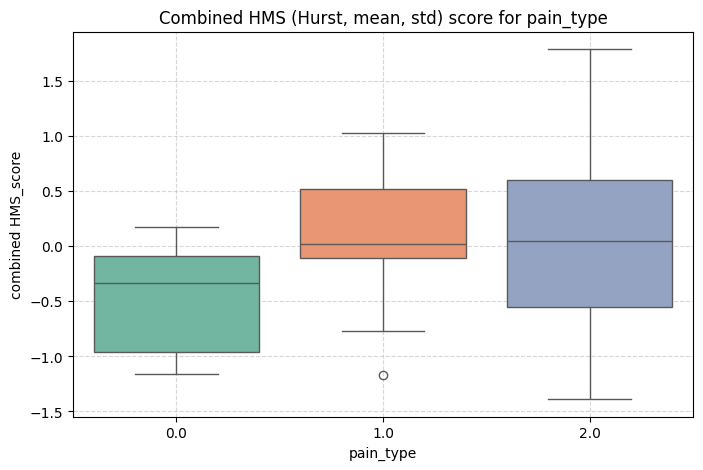


=== Медианы по группам ===
pain_type = 0: медиана = -0.3331
pain_type = 1: медиана = 0.0185
pain_type = 2: медиана = 0.0454


In [110]:

# Удалим строки с пропусками
df = df.dropna(subset=[
    'Avg_Resp_Left_Mean', 'Avg_Resp_Left_Std', 'Avg_Resp_Left_Hurst',
    'Avg_Resp_Right_Mean', 'Avg_Resp_Right_Std', 'Avg_Resp_Right_Hurst',
    'pain_type'
])

# Обозначения
L_M = df['Avg_Resp_Left_Mean']
L_S = df['Avg_Resp_Left_Std']
L_H = df['Avg_Resp_Left_Hurst']

R_M = df['Avg_Resp_Right_Mean']
R_S = df['Avg_Resp_Right_Std']
R_H = df['Avg_Resp_Right_Hurst']

eps = 0

# Новая комбинация: нормированная асимметрия по H, M, S
asym_H = (R_H - L_H) / (R_H + L_H + eps)
asym_M = (R_M - L_M) / (R_M + L_M + eps)
asym_S = (R_S - L_S) / (R_S + L_S + eps)

df['combined_HMS_score'] = asym_H + asym_M + asym_S

# Kruskal–Wallis test
groups = [df[df['pain_type'] == pt]['combined_HMS_score'] for pt in sorted(df['pain_type'].unique())]
H_stat, p_val = kruskal(*groups)

print("=== Тест для комбинации Hurst + Mean + Std ===")
print(f"Название признака: combined_HMS_score")
print(f"Формула: asym(H) + asym(M) + asym(S)")
print(f"Kruskal–Wallis H = {H_stat:.4f}, p = {p_val:.5f}")

if p_val < 0.05:
    print("✅ СТАТИСТИЧЕСКИ ЗНАЧИМО (p < 0.05)")
else:
    print("❌ Не значимо")

# Визуализация
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='pain_type', y='combined_HMS_score', palette='Set2')
plt.title('Combined HMS (Hurst, mean, std) score for pain_type')
plt.xlabel('pain_type')
plt.ylabel('combined HMS_score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Описательная статистика
print("\n=== Медианы по группам ===")
for pt in sorted(df['pain_type'].unique()):
    median_val = df[df['pain_type'] == pt]['combined_HMS_score'].median()
    print(f"pain_type = {int(pt)}: медиана = {median_val:.4f}")

`combined_HMS_score` объединяет **нормированную межполушарную асимметрию** по трём ключевым характеристикам TMS-ответа:

\[
\text{asym}_X = \frac{X_R - X_L}{X_R + X_L}, \quad X \in \{ \text{Hurst},\ \text{Mean},\ \text{Std} \}
\]

Это — **относительная разность**, выражающая, **насколько одно полушарие отличается от другого в процентах от их общей активности/сложности**.

---

#### 1. **Инвариантность к индивидуальному масштабу**
- У разных пациентов **абсолютные значения** (например, амплитуда ответа) сильно различаются из-за:
  - возраста,
  - толщины черепа,
  - положения катушки,
  - уровня возбудимости коры.
- Использование **относительной разности** устраняет этот источник вариабельности.
- Пример:  
  - Пациент A: `R_M = 200`, `L_M = 100` → `asym_M = (200−100)/(200+100) = 0.33`  
  - Пациент B: `R_M = 40`, `L_M = 20` → `asym_M = (40−20)/(40+20) = 0.33`  
  → **одинаковая относительная асимметрия**, несмотря на разный масштаб.

> Это критически важно для **сравнения между пациентами**.

#### 2. **Интеграция трёх независимых аспектов TMS-ответа**
- **Hurst exponent** — отражает **сложность и долгосрочную зависимость** нейронального ответа (связан с саморегуляцией, стабильностью сети).
- **Mean (амплитуда)** — мера **силы коркового ответа** (возбудимость).
- **Std (стандартное отклонение)** — показатель **вариабельности/стабильности** ответа от стимула к стимулу.
- Комбинирование этих трёх аспектов даёт **целостную картину межполушарного дисбаланса**, а не фокусируется на одном признаке.

#### 3. **Физиологическая интерпретация знака**
- Положительное значение `asym_X` → **правое полушарие выше** по параметру `X`.
- Отрицательное → **левое выше**.
- Сумма `asym_H + asym_M + asym_S` усиливает сигнал, если **асимметрия согласована по нескольким параметрам** (например, правое полушарие и сложнее, и сильнее, и стабильнее).
- Это повышает **чувствительность к патологическим паттернам**, характерным для хронической боли.

#### 4. **Совместимость с нейрофизиологическими моделями**
- В литературе по TMS и хронической боли часто описывают **гиперактивность одного полушария** и **гипоактивность другого** — причём это касается **и амплитуды, и вариабельности, и динамики**.
- Ваш признак **естественным образом ловит такой синхронный дисбаланс**.

---
Признак `combined_HMS_score`:

- **Физиологически мотивирован**: отражает согласованную межполушарную асимметрию по трём ключевым параметрам.
- **Статистически робастен**: инвариантен к масштабу, усиливает согласованный сигнал.
- **Клинически интерпретируем**: положительные/отрицательные значения указывают на доминирование правого/левого полушария.
- **Позволяет выявить скрытые различия** между группами `pain_type`, даже если отдельные признаки не значимы.

Если тест **показал p < 0.05**, вы нашли **интегративный биомаркер**, который может быть использован для **дифференциальной диагностики типов боли** на основе TMS-ответов.

In [58]:
df = table_data

In [59]:
df.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [62]:

# Удалим строки с пропусками
df = df.dropna(subset=[
    'score_pain_reiting', 'score_osvestri', 'score_beck',
    'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
    'pain_type'
])


# Kruskal–Wallis test
groups = [df[df['pain_type'] == pt]['score_csi'] for pt in sorted(df['pain_type'].unique())]
H_stat, p_val = kruskal(*groups)


print(f"Kruskal–Wallis H = {H_stat:.4f}, p = {p_val:.5f}")

if p_val < 0.05:
    print("✅ СТАТИСТИЧЕСКИ ЗНАЧИМО (p < 0.05)")
else:
    print("❌ Не значимо")






Kruskal–Wallis H = 1.5711, p = 0.21004
❌ Не значимо


In [111]:

import statsmodels.formula.api as smf
from scipy.stats import chi2 # критические значения chi2-распределения

In [112]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_beck',
       'score_spilberg_person', 'score_spilberg_anxiety', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'threshold_left', 'threshold_right',
       'motor_evoked_right', 'motor_evoked_left', 'avg_respone_right',
       'avg_respone_left', 'theshold_edge_right', 'theshold_edge_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right.1', 'theshold_edge_left.1',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_interstimul_threshod', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [114]:
mod = smf.logit(formula='pain_type~score_pain_reiting + score_osvestri + score_beck + score_spilberg_person + score_spilberg_anxiety + score_csi', data=table_data) # спецификация модели
res = mod.fit() # подгонка модели
res.nobs # число наблюдений, на которых была подогнана модель

Optimization terminated successfully.
         Current function value: 0.432303
         Iterations 8


25

In [116]:
sign_level = 0.05 # уровень значимости
chi2.ppf(q=1-sign_level, df=res.df_model).round(3)
res.llr_pvalue.round(3)

np.float64(0.137)

In [120]:
res.wald_test('score_csi=score_pain_reiting=score_osvestri=score_beck=score_spilberg_person=score_spilberg_anxiety=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[4.65195915]], p-value=0.5891613917769329, df_denom=6>

In [121]:
res.wald_test('score_csi=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.63353709]], p-value=0.20121451645294297, df_denom=1>

In [122]:
res.wald_test('score_pain_reiting=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[0.01198302]], p-value=0.9128321018563388, df_denom=1>

In [123]:
res.wald_test('score_osvestri=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.91556357]], p-value=0.0877287596660371, df_denom=1>

In [124]:
res.wald_test('score_beck=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[0.11824468]], p-value=0.7309461252634876, df_denom=1>

In [125]:
res.wald_test('score_spilberg_person=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.79845744]], p-value=0.17989909484681, df_denom=1>

In [126]:
res.wald_test('score_spilberg_anxiety=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[0.35586719]], p-value=0.5508105000520161, df_denom=1>